# Gradient Boost &rarr; Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

Like RandomForestRegressor, it has hyperparameters to control the growth of Decision Trees (max_depth, min_sample_leaf, etc) as hyperparameters to control the ensemble trainig (for example, n_estimators)

The smaller the learning rate, the better the generalization &rarr; shrinkage

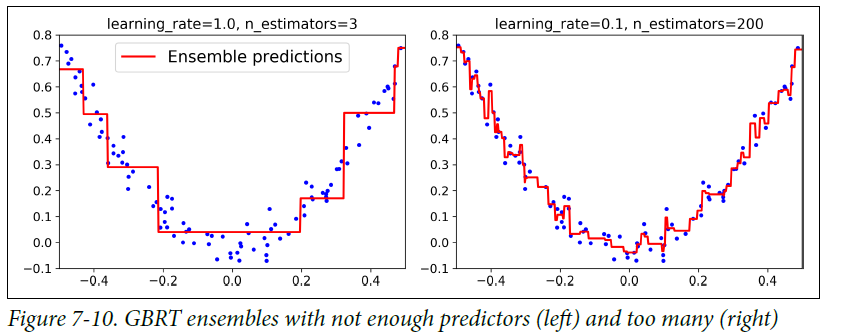


### Comparison with AdaBoost

Gradient Boost starts by making a single leaf, instead of a tree or a stump.

 * The leaf represents an initial guess for the label of all samples &rarr; the first guess for a continuous value is the average value
 * Then Gradient Boost builds a tree, like AdaBoost, and this tree will be based on the errors made by the previous tree. But unlike AdaBoost, the tree is usually larger than a stump (but it is still size restricted - 8 to 32 laves).
 * The trees are then scaled and the process is repeated untill it has made the number of trees we asked for or addidtional trees fail to improve the fit.
 
 

## Step by Step &rarr; building a tree

 1) In this case, we will predict weight of a patient considering their height, favorite color, and gender.
 
Our initial leaf will be the average weight of the data.


<div>
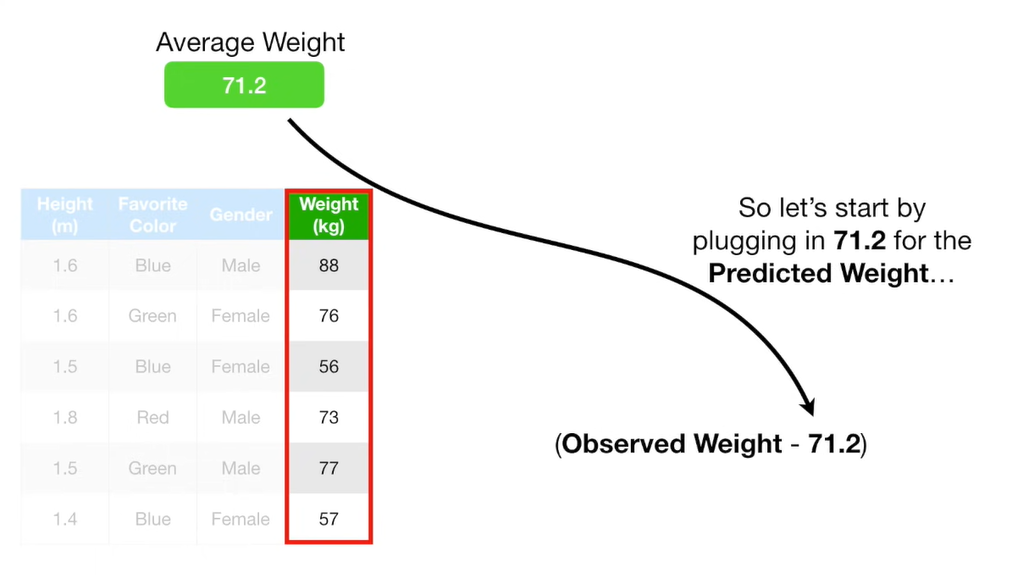
</div>


 2) From the initial guess, calculate the _pseudo residuals_, the difference between the observed and predicted values.
 
<div>
 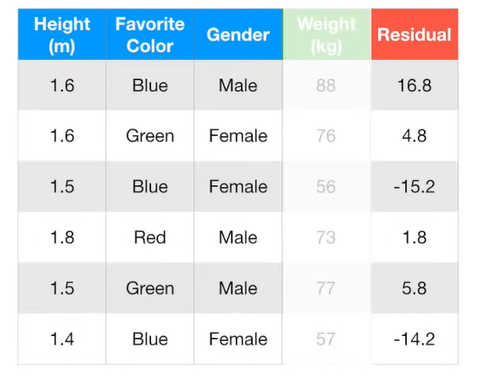
</div>

3) Now, we will build the tree using the features to _predict the residual_ 

<div>
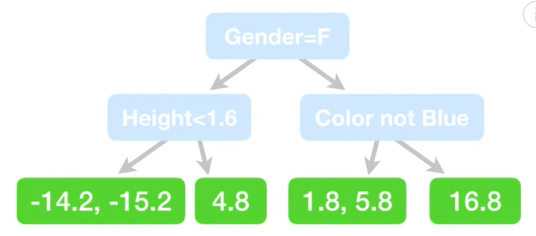
</div>
    
    
By restricting the number of leaves, we get fewer leaves than residuals, so residuals that got to the same leaf are averaged out.




4) Now we use the initial leaf and a _scaled_(i.e., with <b>learning rate</b>) new built tree

<div>
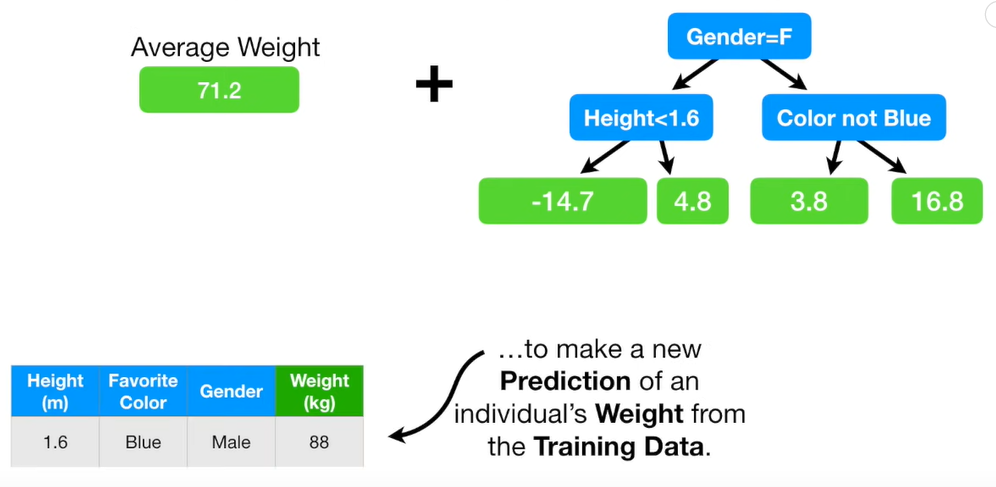
</div>

---

<div>
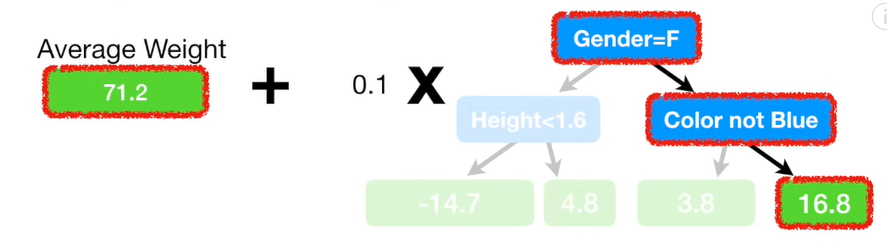
</div>


The learning rate ranges from 0 to 1, and according to empirical evidence, applying a learning rate helps getting better predictions with a testing dataset, i.e, lower variance.

5) With the new tree, calculate new residuals, build another tree to predict them, and repeat the process until we reach the maximum number of trees specified, or when adding additional trees does not significantly reduce the size of the residuals.

# Regression Details

 <div>
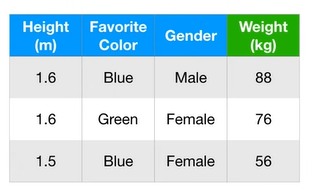
</div>

<div>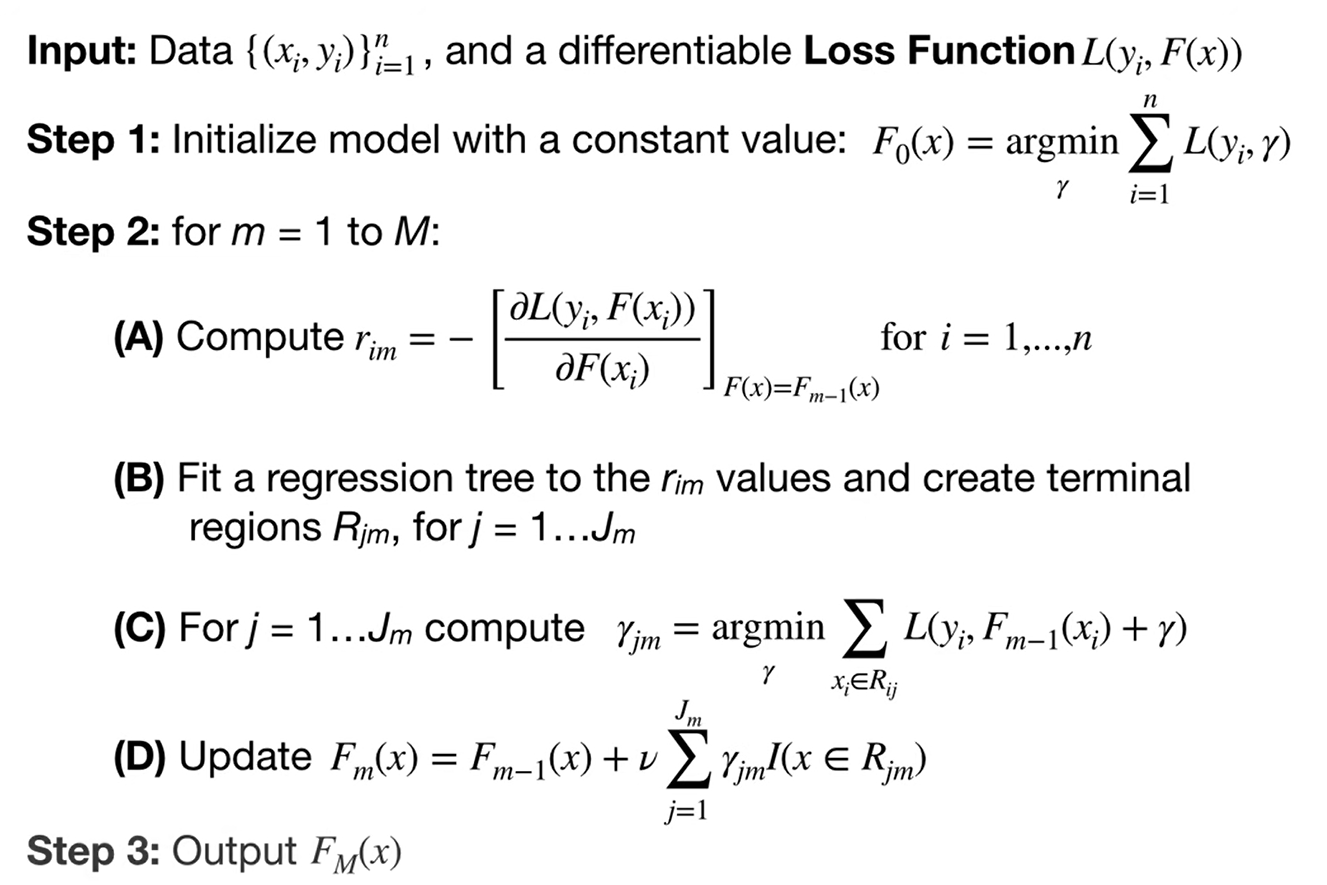</div>


### Input
For step 1, we will use the Loss Function $\frac{1}{2}(Observed-Predicted)^2$, which is the most popular one for regression.

with Observed values $y_{i}$, and Predicted values $F(x)$

### Step 1

For the given Loss Function, the initial argument $F_{0}(x)$ is the mean of the observed values

### Step 2

We will make $M$ trees (in practice, usually 100).

A) Derivative (Gradient) of the Loss Function &rarr; Residual

<div>
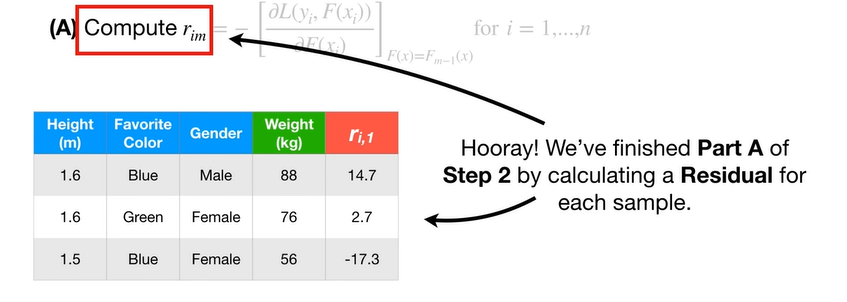
</div>

the $r_{i,m}$ are called pseudo residuals

B) We will build a tree to predict a the Residuals instead of the weights.

<div>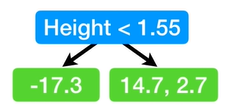</div>

The Leaves are the "terminal regions $R_{j,m}$", where j is the index for each leaf in the tree.

<div>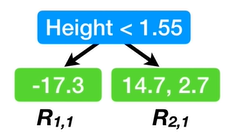</div>


C) We compute an Output Value $\gamma_{j,m}$

<div>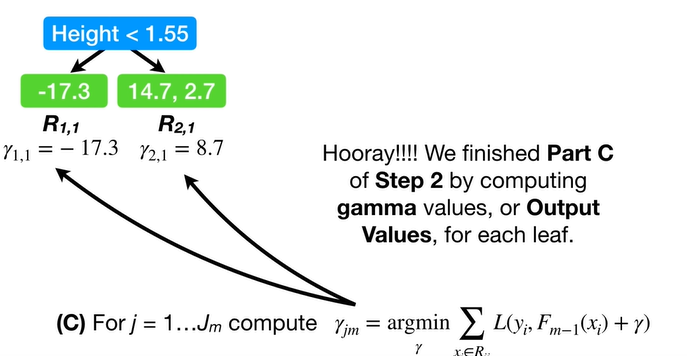</div>


D ) We make a new prediction for each sample. $\nu$ is the learning rate.
<div>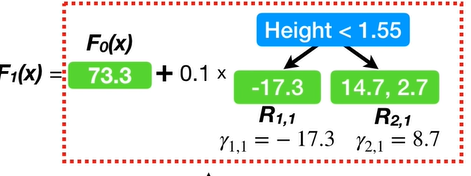</div>

With $F_{1}(x)$ defined, let's calculate the new Prediction

<div>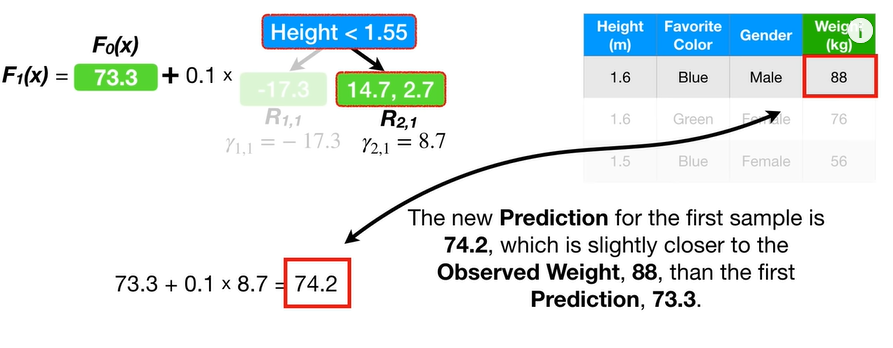</div>


# Classification

## Step-by-step

1) Just like in Regression, we start with a leaf that represents an initial prediction for every individual.

 * When we use Gradient Boost for Classification, the initial Prediction for every individiual is the log(odds)
 
<div>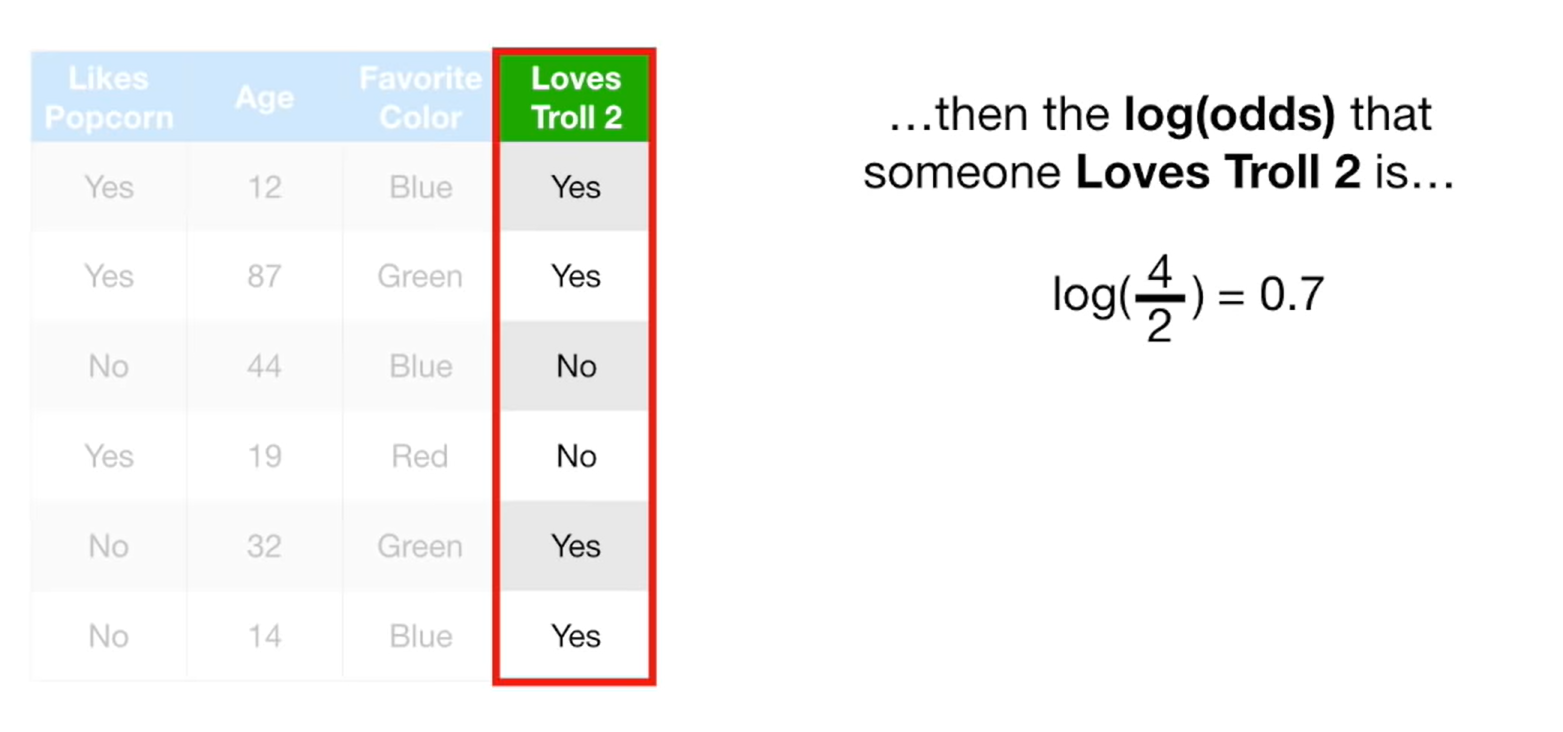</div>
 
 How de we use the initial prediction for classification? &rarr; logistic function $$\frac{e^{log(odds)}}{1+e^{log(odds)}}$$

<div>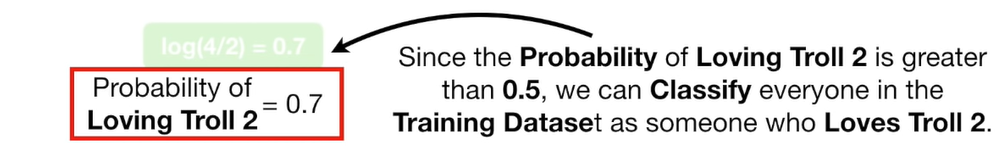</div>


Then, we calculate the pseudo residuals

<div>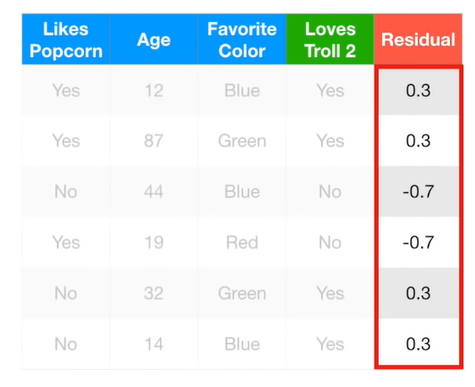</div>

Now, we build a tree to predict the residuals. Again, we limit the number of leaves (8 to 32)

<div>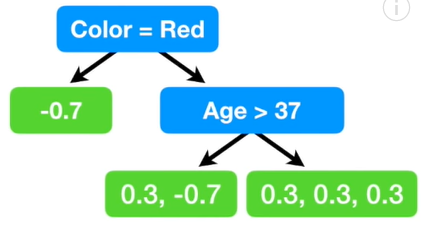</div>

then, calculate the output values. Different from Regression, the outputs won't be the average of the values on the leaves. The predictions are in terms of log(odds), and the leaf is derived from a probability, so adding them to make a new prediction does not make sense.


<div>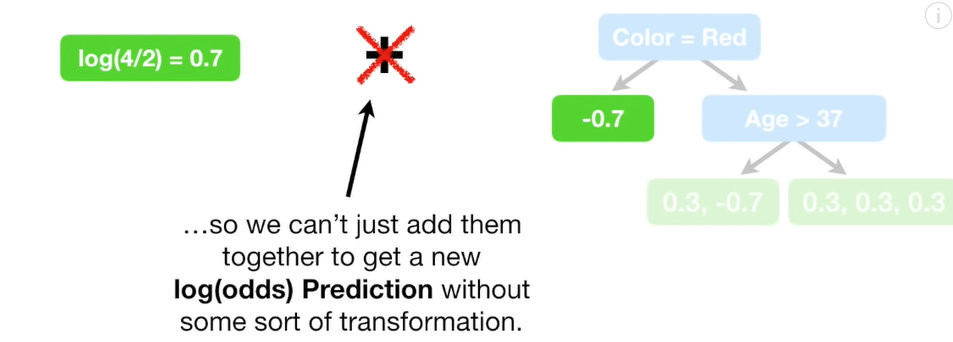</div>

--- 

<div>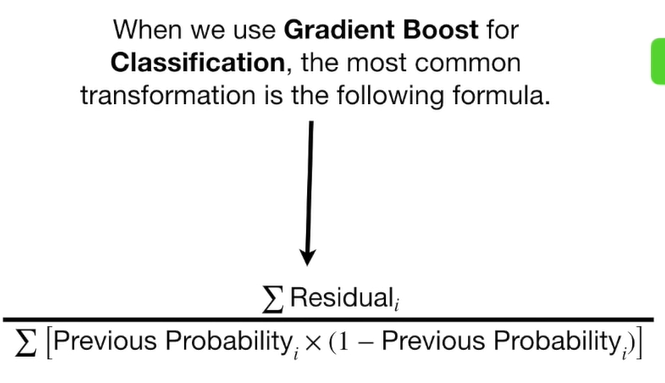</div>

Now, combine the initial leaf with the new tree to update the log(odds)Predictions

<div>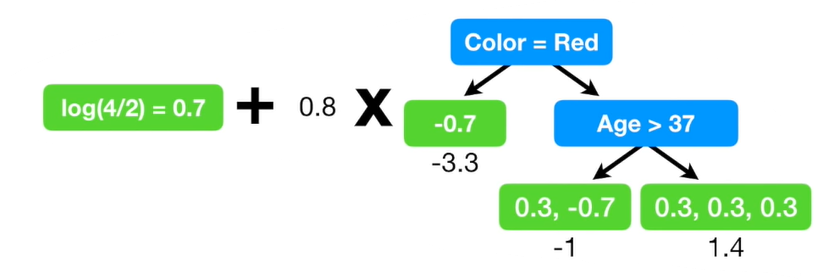</div>


And apply the logistic function to get new probabilities for the instances, and calculate the residuals

<div>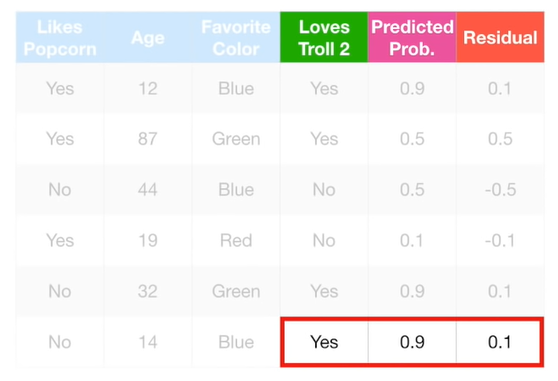</div>


With the residuals, we build a new tree, and start over the iteration until the process is done.

# Classification Details



<div>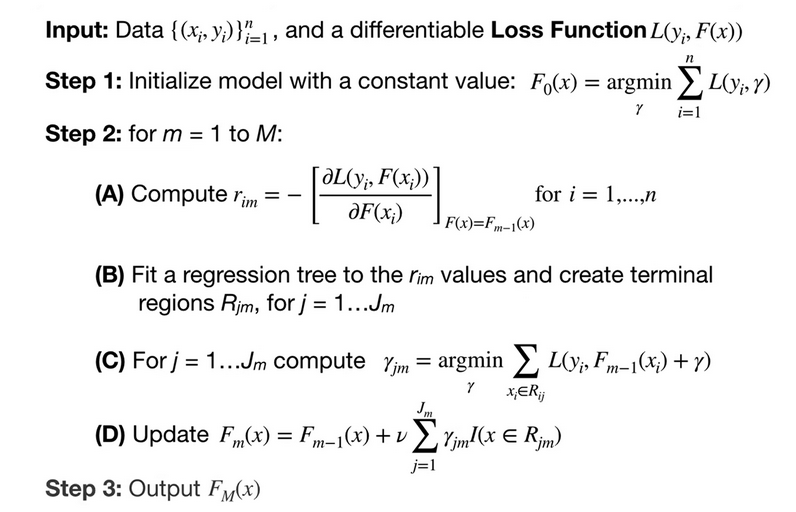</div>

The steps are similar to Regression, however:

Input) For the Loss Functions:

<div>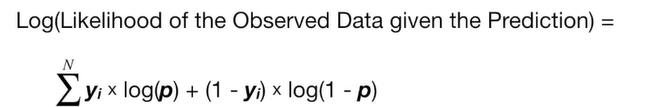</div>

The better the prediciton, the larger the log(likelihood), so for logistic regression the goal is to _maximize_ the log(likelihood).

To use it as a Loss Function, we need to multiply it by -1

<div>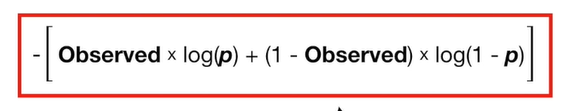</div>


Now, we transform the negative log(likelihood) to be a function of the predicted log(odds) instead of the predicted probability p

<div>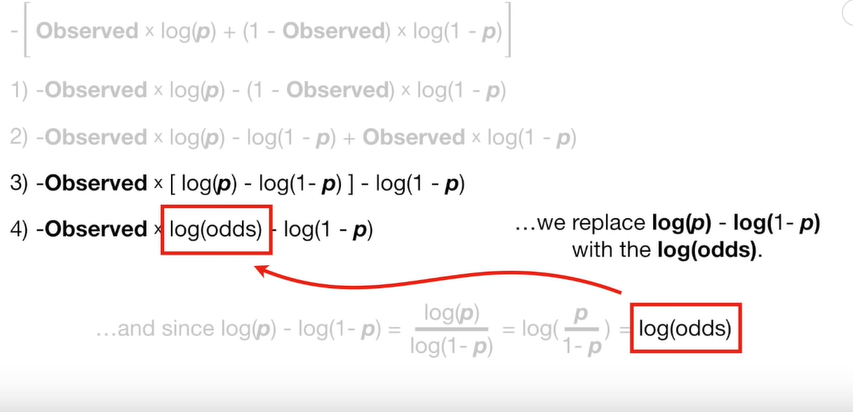</div>



Now we need to also convert log(1-p) into a function of the log(odds)

<div>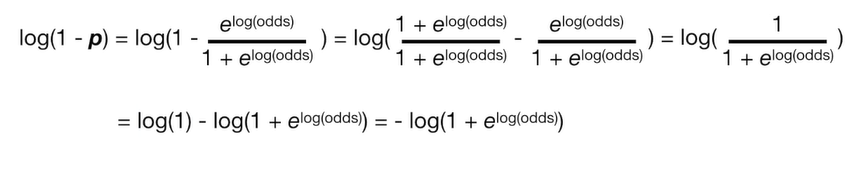</div>


And,

<div>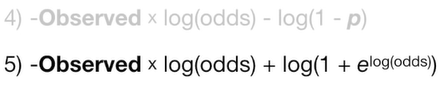</div>

With 

<div>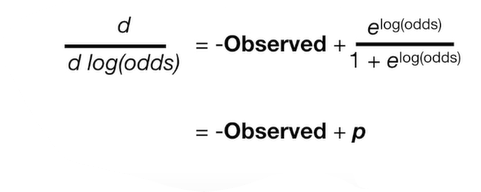</div>




### Step 1) 

<div>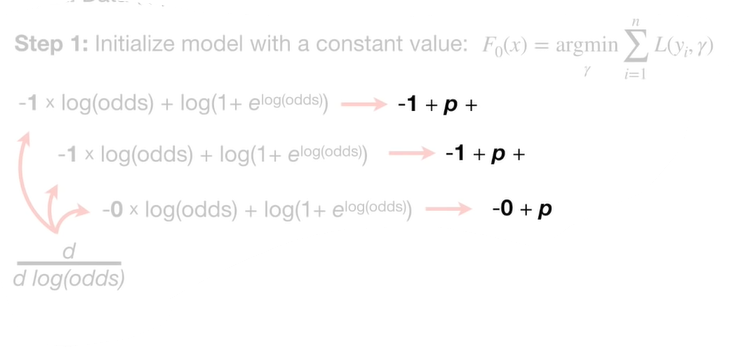</div>
<div>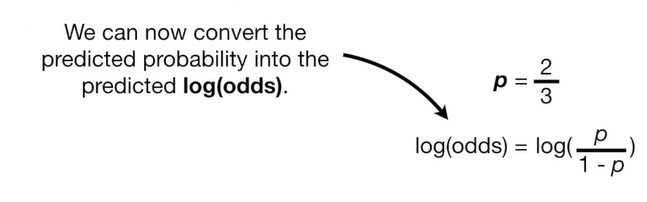</div>



So, for this example
<div>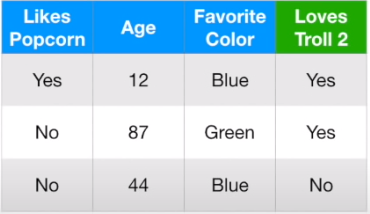</div>

We end up with the initial leaf $$F_{0}(x) = log(\frac{2}{1}) = 0.69$$ That predicts the log(odds) that someone will Love Troll 2 = 0.69

### Step 2

<div>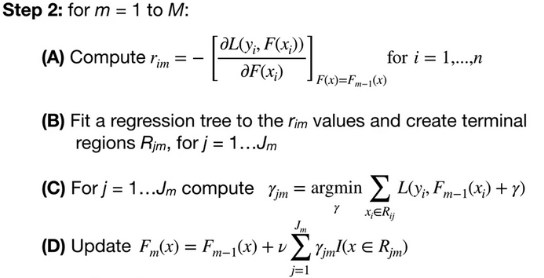</div>


#### In part A), we calculate the pseud residuals. The functions is the derivative of the Loss Function with respect to the predicted log(odds)

$$-\frac{d}{dlog(odds)}-Observed\times log(odds) + log(1+e^{log(odds)}) = -(-Observed + \frac{e^{log(odds)}}{1+e^{log(odds)}}) =Observed - \frac{e^{log(odds)}}{1+e^{log(odds)}}) = (Observed - p)$$

And we can see that the pseudo residuals are the difference between the observed and predicted probabilities.

<table><tr>
<td> 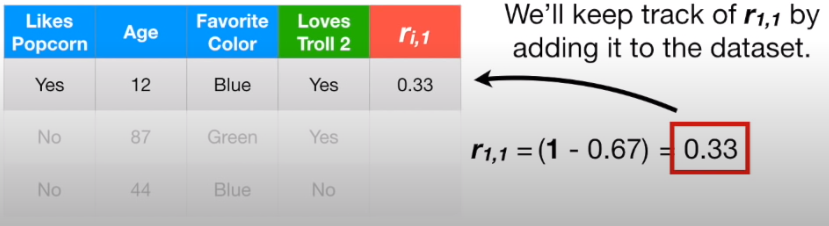 </td>
<td> 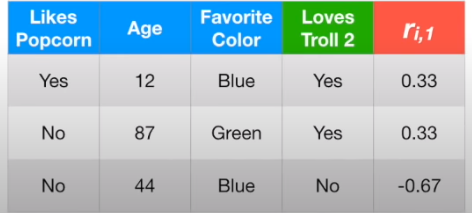 </td>
</tr></table>

#### In part B, we will build a regression tree

<div>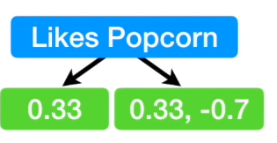</div>

And now we create the terminal regions $R_{j,m}$

<div>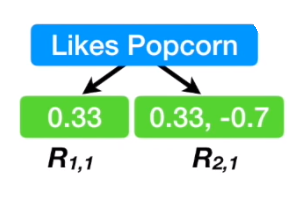</div>


####  In part C, we will calculate the Output Values for the new tree

<div>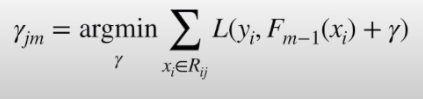</div>

In theory, we could derivate it with respect to $\gamma$ and then solve for it, but that would turn into a mess, so we will take a different approach than when we used Gradient Boost for Regression.

<div>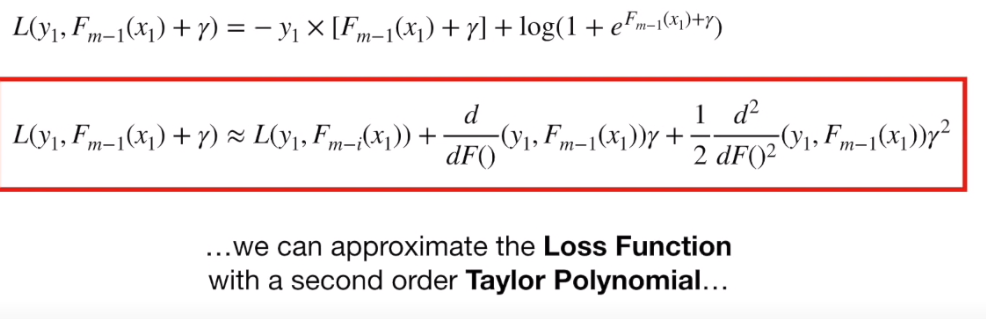</div>

<div>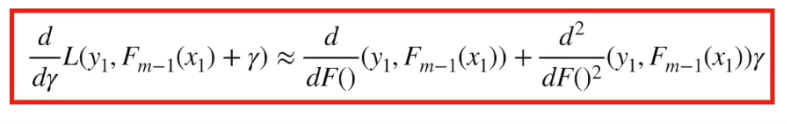</div>

Now, we set it to 0, and solve for $\gamma$

<div>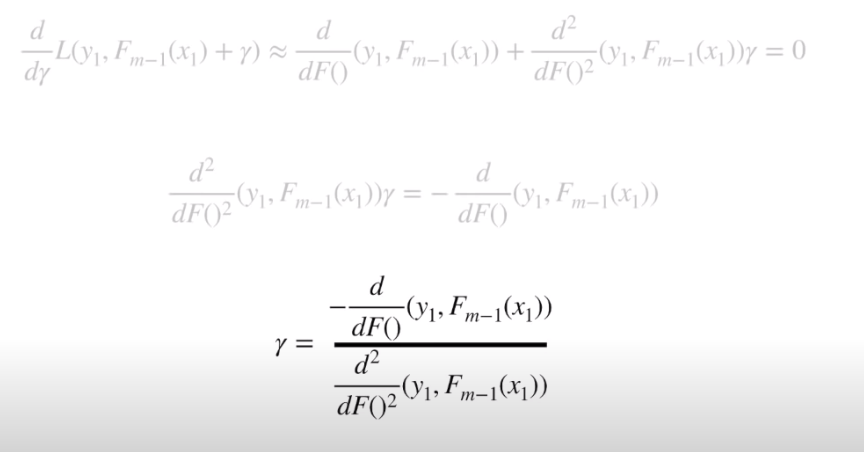</div>


And, after simplifications of the equation (the first derivative of the loss function is the residual, its second derivative is equal to $p \times (1-p)$ $$\gamma = \frac{Residual}{p \times (1-p)}$$

For this example 
<div>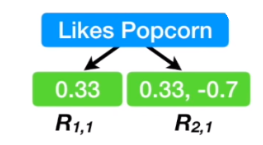</div>

We have to remember that the first calculated probability was $F_{0}(x) = log(\frac{2}{1}) = 0.69$. 

So, we have $$p=\frac{e^{log(odds)}}{1+e^{log(odds)}} =\frac{e^{0.69}}{1+e^{0.69}} = 0.67 $$ and $$\gamma = \frac{Residual}{p \times (1-p)} = \frac{0.33}{0.67 \times (1-0.67)} = 1.5$$ 

For the second leaf, we now have two Loss Functions being added: we approximate both of them with a second order Taylor Polynomial, and then find the optimal values for $\gamma$

<div>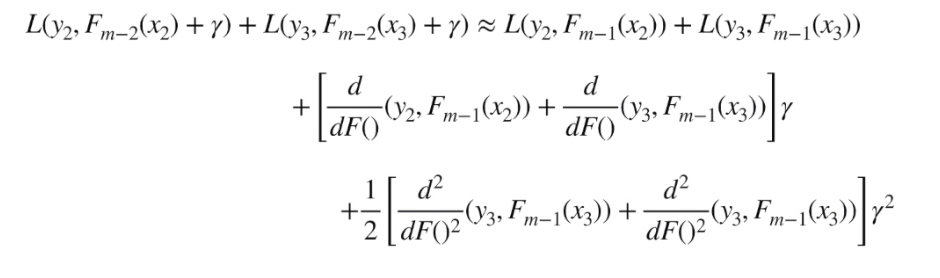</div>

---

<div>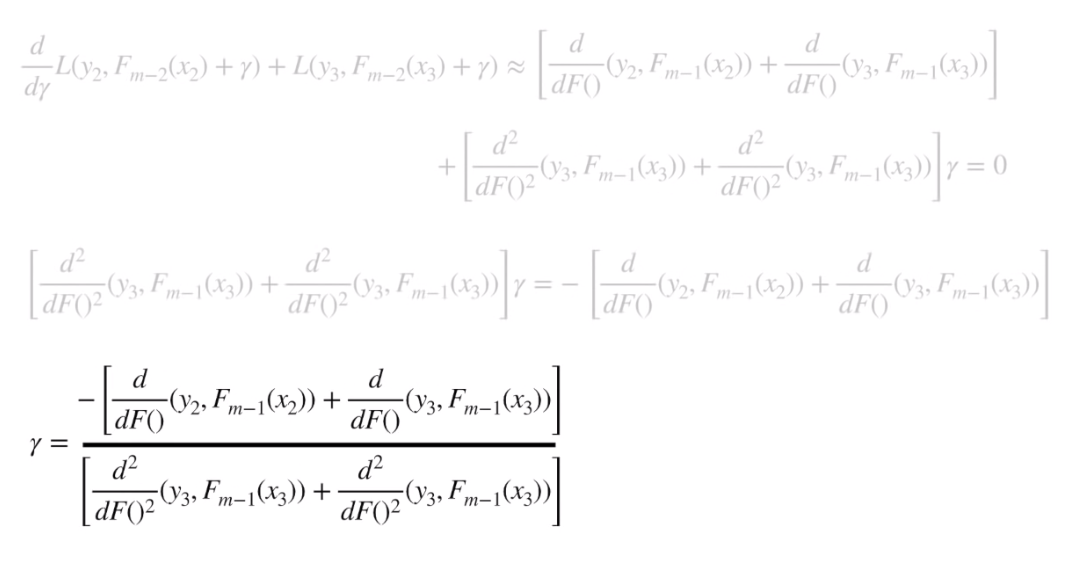</div>



Now, simplifying it: $$\gamma = \frac{Residual_{2} + Residual_{3}}{[p_2\times (1-p_2)]\times[p_3\times (1-p_3)]}$$

Giving us the final result 

<div>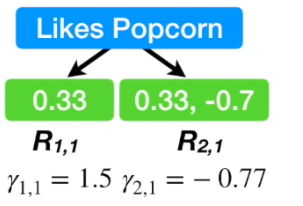</div>


#### Now, for part D, we make a new prediction of the log(odds) for each sample. 

<div>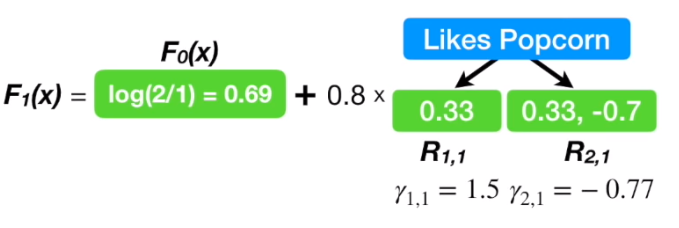</div>
